# IBM HR Analytics Employee Attrition & Performance.

In [168]:
#Importing Various Modules

In [169]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder

In [170]:
#Reading the data from a CSV file
hr= pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [171]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [172]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [173]:
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

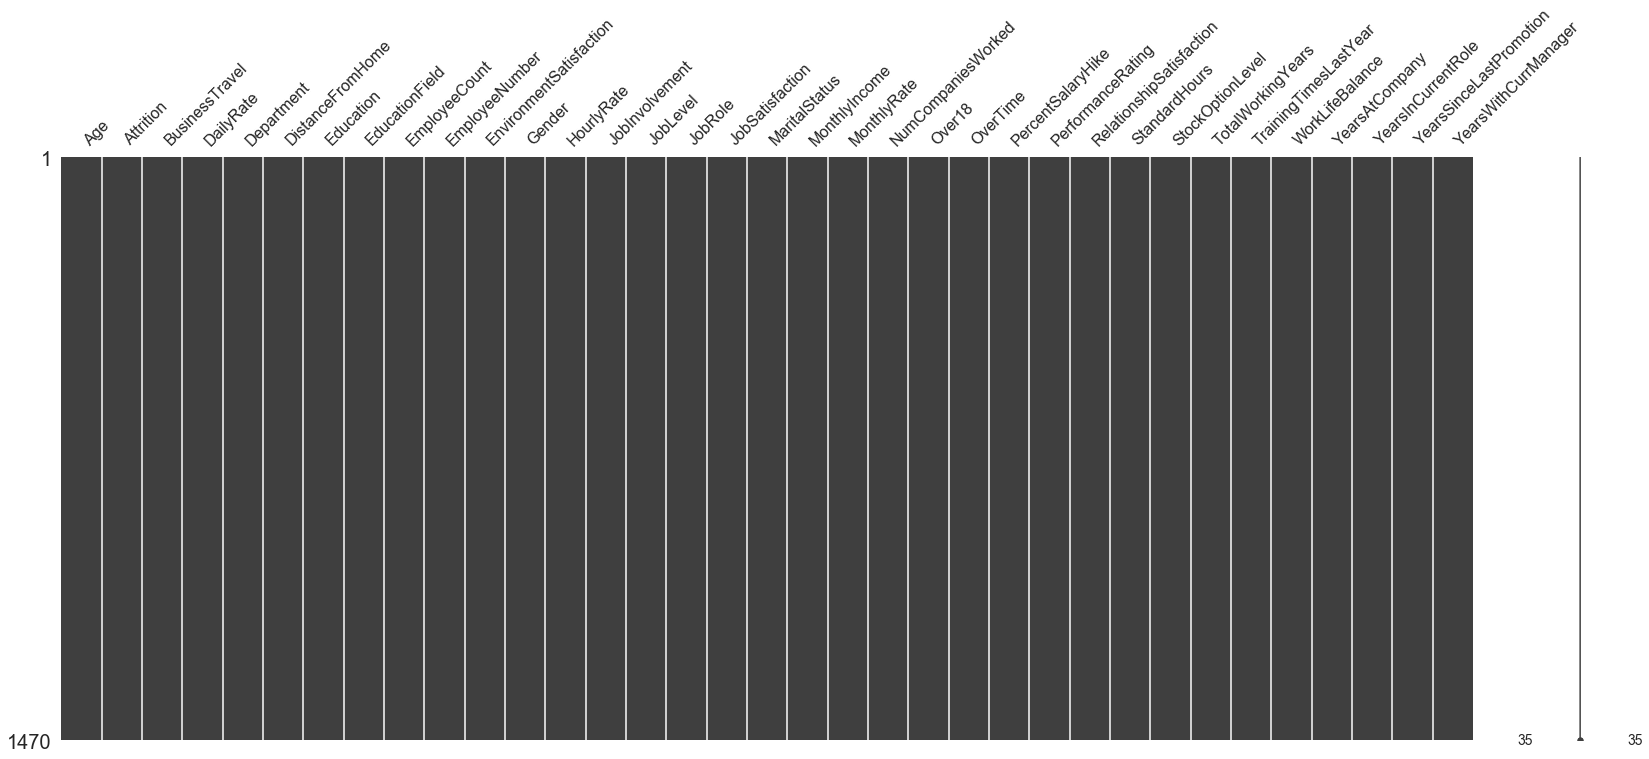

In [174]:
msno.matrix(hr) 

In [175]:
print(hr.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [176]:
#there is  column employe number in the dataset that we can drop as it does not helps so we drop
hr.drop(columns=["EmployeeNumber"],inplace=True)

In [177]:
hr.apply(lambda x : len(x.unique()))

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

In [178]:
for col in hr.columns:
    if hr[col].dtype=="object":
        print("column name is: {} and number of distinct values: {}".format(col,len(hr[col].value_counts())))
        print()

column name is: Attrition and number of distinct values: 2

column name is: BusinessTravel and number of distinct values: 3

column name is: Department and number of distinct values: 3

column name is: EducationField and number of distinct values: 6

column name is: Gender and number of distinct values: 2

column name is: JobRole and number of distinct values: 9

column name is: MaritalStatus and number of distinct values: 3

column name is: Over18 and number of distinct values: 1

column name is: OverTime and number of distinct values: 2



In [179]:
#frequency of categories
for col in hr.columns:
    if hr[col].dtype=="object":
        print(hr[col].value_counts())
        print()

No     1233
Yes     237
Name: Attrition, dtype: int64

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Male      882
Female    588
Name: Gender, dtype: int64

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

Y    1470
Name: Over18, dtype: int64

No     1054
Yes     416
Na

In [180]:
#lets see over18 column
hr["Over18"].unique()
#this columnn has only one value throughout the dataset so it will not help us in any way so lets drop

array(['Y'], dtype=object)

In [181]:
hr.drop(columns=["Over18"],inplace=True)

In [182]:
hr["EmployeeCount"].unique()
#EmployeeCount is having same vaue in entire dataset

array([1], dtype=int64)

In [183]:
#Lets drop EmployeeCount column
hr.drop(columns=["EmployeeCount"],inplace=True)

In [184]:
hr["StandardHours"].unique()
#StandardHours has same value throughout

array([80], dtype=int64)

In [185]:
#Lets drop StandardHours as it will not proovide any infrmation
hr.drop(columns=["StandardHours"],inplace=True)

In [186]:
#lets see correlation matrix
hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


In [187]:
hr.shape

(1470, 31)

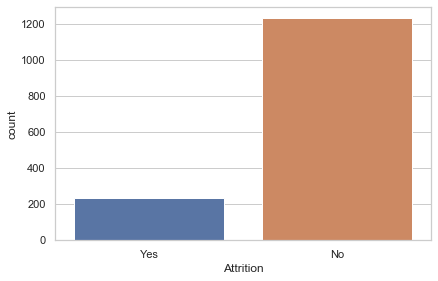

In [188]:
#Lets check the count of attrition
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Attrition",data=hr)
plt.show()
#so this is a higly imbalanced dataset,here out of every 6 employee 1 is facing attrition

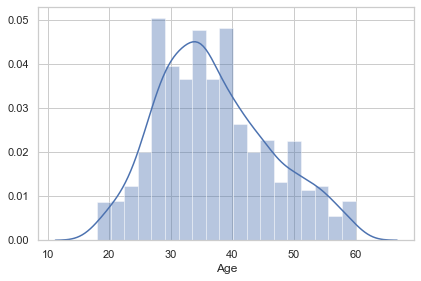

In [189]:
sns.distplot(hr['Age'])

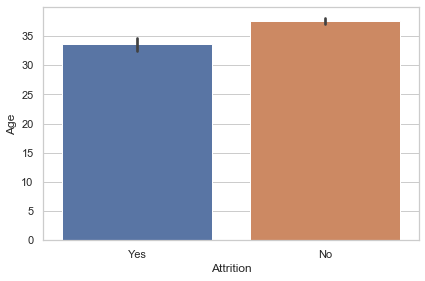

In [190]:
#Lets see average age of employees who is leaving to that who are staying
sns.barplot(x="Attrition",y="Age",data=hr)
plt.show()

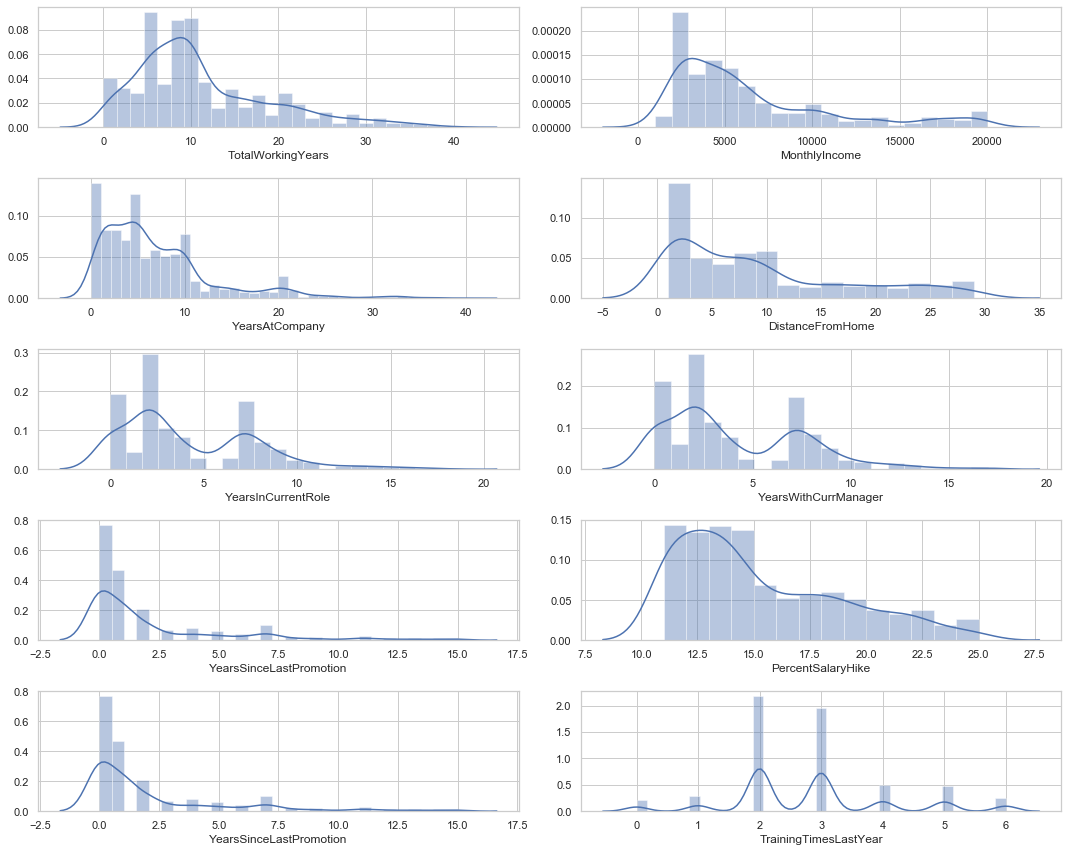

In [191]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(5,2, figsize=(15,12))                
sns.distplot(hr['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(hr['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(hr['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(hr['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(hr['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(hr['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(hr['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(hr['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(hr['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(hr['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

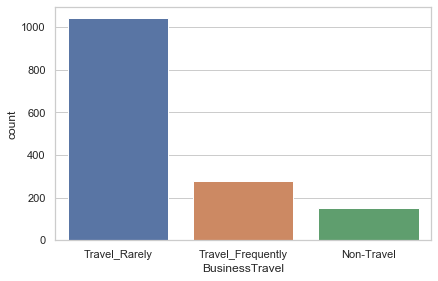

In [192]:
#Lets check the count of employees based on buisness travel
sns.countplot(x="BusinessTravel",data=hr)
plt.show()
#most of the employee travel rarely

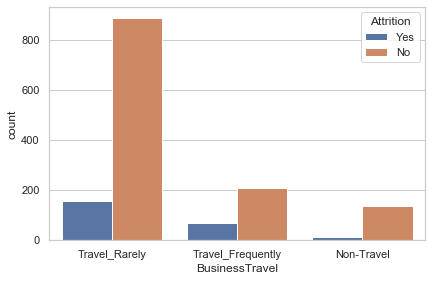

In [193]:
#Lets see the count of each category of buisness travel wrt employee attrition.
sns.countplot(x="BusinessTravel",data=hr,hue="Attrition")
plt.show()
#proportion of attrition is higher where travel is frequent

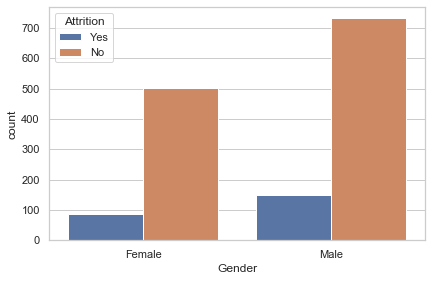

In [194]:
#lets chcek the attrition ratio based on gender
sns.countplot(x="Gender",data=hr,hue="Attrition")
plt.show()

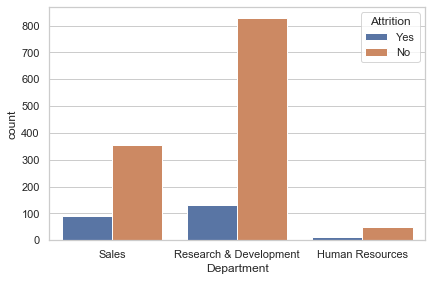

In [195]:
#lets check in which department attrintion is high
sns.countplot(x="Department",data=hr,hue="Attrition")
plt.show()
#here if we compare ratio then in R&D attrition is 1  out of 9 employee.

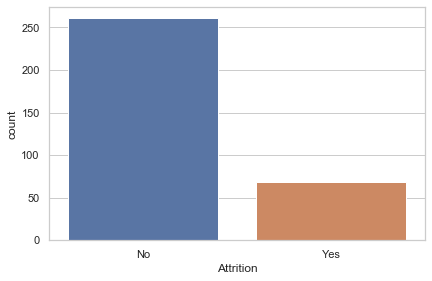

In [196]:
#lets chcek when distance from home is above 15 kms whats the attrition
sns.countplot(x="Attrition",data=hr.loc[hr["DistanceFromHome"]>15])
plt.show()

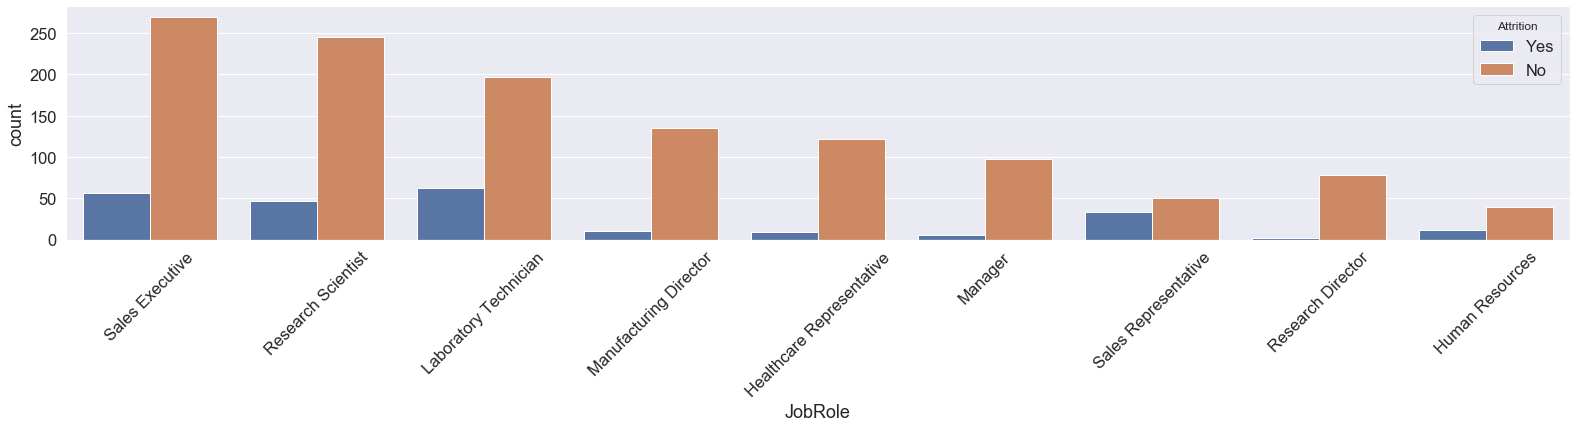

In [197]:
#Lets chcek the attrition in each job role
plt.figure(figsize=(24,4))
sns.set(font_scale=1.5)
sns.countplot(x="JobRole",data=hr,hue="Attrition")
plt.xticks(rotation=45)
plt.show()
#so we can analyse the attrition ratio in each category and take corrective actions by understanding the reason behind 
#the attrition

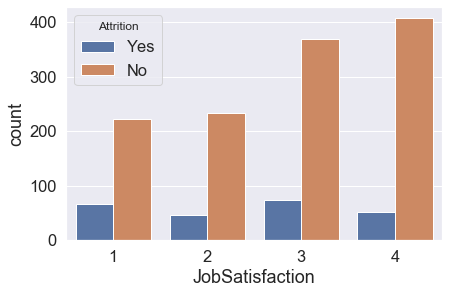

In [198]:
#lets chcek the attrition ratio based on job satisfaction
sns.countplot(x="JobSatisfaction",data=hr,hue="Attrition")
plt.show()
#As job satisfaction increases proportion of aleavers decreases

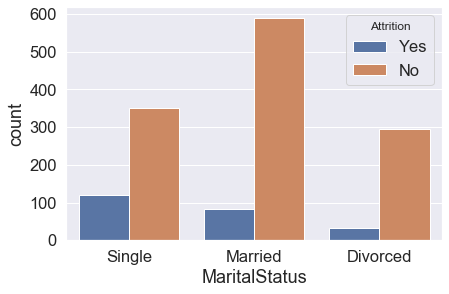

In [199]:
#Lets chcek the attrition ratio in MaritalStatus
sns.countplot(x="MaritalStatus",data=hr,hue="Attrition")
plt.show()

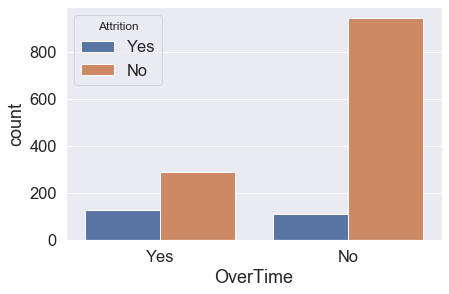

In [200]:
#Lets compare check the proportion of attrition based on overtime
sns.countplot(x="OverTime",data=hr,hue="Attrition")
plt.show()
#In overtime attrition proportion is higher

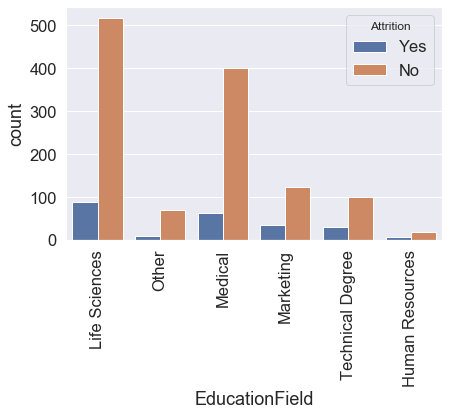

In [201]:
#Lets see the count of each category of EducationField wrt employee attrition.
sns.countplot(x="EducationField",data=hr,hue="Attrition")
plt.xticks(rotation=90)
plt.show()

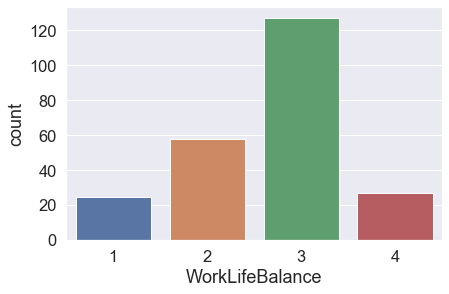

In [202]:
#lets chcek the work life balance with attrition
sns.countplot(x="WorkLifeBalance",data=hr.loc[hr["Attrition"]=="Yes"])
plt.show()

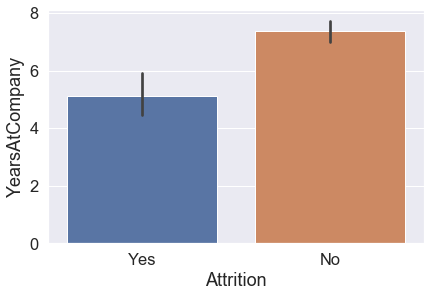

In [203]:
# average working years of the employee who left and wh stayed
sns.barplot(x="Attrition",y="YearsAtCompany",data=hr)
plt.show()
# so here we get what is the average number of years employee is staying in the company before leaving

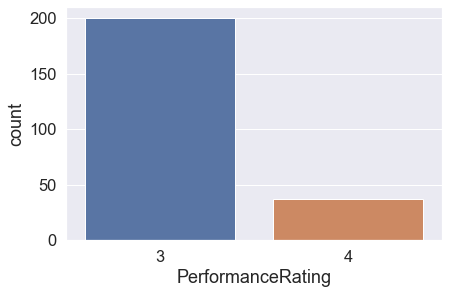

In [204]:
#Now lets check how performnce rating is afecting attrition level
sns.countplot(x="PerformanceRating",data=hr.loc[hr["Attrition"]=="Yes"])
plt.show()
#may be since they expect that their work deserves more rating and is undervalued coz almost all the people who left 
#were who got rating 3

In [205]:
pd.crosstab(columns=[hr.Attrition],index=[hr.Department],margins=True,normalize='index') 
# set normalize=index to view rowwise %.
#most of the observations corresspond to 'No' as we saw previously also.
#About 81 % of the people in HR dont want to leave the organisation and only 19 % want to leave.

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


In [206]:
pd.crosstab(columns=[hr.Attrition],index=[hr.EnvironmentSatisfaction],margins=True,normalize='index') 
# set normalize=index to view rowwise %.

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


In [207]:
#lets chcek the skewness in the dataset
print(hr.skew())
print("Total count of numeric features: ",len(hr.skew()))
print("count of features which are significantly skewed: ",len(hr.skew().loc[abs(hr.skew())>0.5]))

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64
Total count of numeric features:  23
count of features which are significantly skewed:  14


In [208]:
#lets seprate the input and output column
df_x=hr.drop(columns=["Attrition"])
y=hr[["Attrition"]]

In [209]:
#lets treat the skewness in the input dataset
import numpy as np
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.log1p(df_x[index])
    if df_x.skew().loc[index]<-0.5:
        df_x[index]=np.square(df_x[index])

In [210]:
#Lets again check the skewness
print(df_x.skew())
print("Total count of numeric features: ",len(df_x.skew()))
print("count of features which are significantly skewed: ",len(df_x.skew().loc[abs(df_x.skew())>0.5]))
#Based on below o/p we can say we have reduced significantly skewed features from 14 to 3

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.029121
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears           0.322355
TrainingTimesLastYear       0.492375
WorkLifeBalance             0.301318
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64
Total count of numeric features:  23
count of features which are significantly skewed:  3


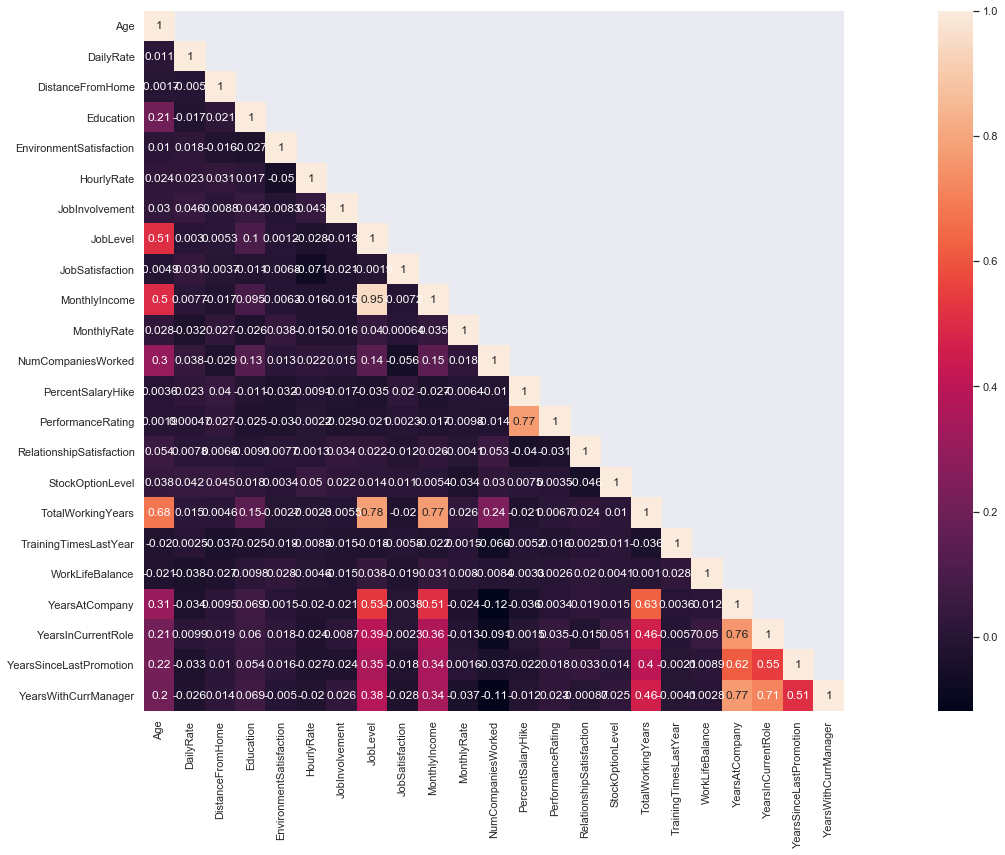

In [211]:
#corelation matrix.
cor_mat= hr.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.set(font_scale=1)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True,fmt='.2g')

In [212]:
def transform(feature):
    le=LabelEncoder()
    df_x[feature]=le.fit_transform(df_x[feature])
    print(le.classes_)

In [213]:
cat_df=df_x.select_dtypes(include='object')
cat_df.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [214]:
for col in cat_df.columns:
    transform(col)

['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [215]:
df_x # just to verify.

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,0.693147,2,1,2,0,94,...,1.386294,1,0.000000,4.827796,0.000000,1,1.945910,1.609438,0.000000,1.791759
1,49,1,279,1,2.197225,1,1,3,1,61,...,1.609438,4,0.693147,5.749902,1.921812,9,2.397895,2.079442,0.693147,2.079442
2,37,2,1373,1,1.098612,2,4,4,1,92,...,1.386294,2,0.000000,4.324077,1.921812,9,0.000000,0.000000,0.000000,0.000000
3,33,1,1392,1,1.386294,4,1,4,0,56,...,1.386294,3,0.000000,4.827796,1.921812,9,2.197225,2.079442,1.386294,0.000000
4,27,2,591,1,1.098612,1,3,1,1,40,...,1.386294,4,0.693147,3.786566,1.921812,9,1.098612,1.098612,1.098612,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,3.178054,2,3,3,1,41,...,1.386294,3,0.693147,8.354249,1.921812,9,1.791759,1.098612,0.000000,1.386294
1466,39,2,613,1,1.945910,1,3,4,1,42,...,1.386294,1,0.693147,5.301898,3.210402,9,2.079442,2.079442,0.693147,2.079442
1467,27,2,155,1,1.609438,3,1,2,1,87,...,1.609438,2,0.693147,3.786566,0.000000,9,1.945910,1.098612,0.000000,1.386294
1468,49,1,1023,2,1.098612,3,3,4,1,63,...,1.386294,4,0.000000,8.354249,1.921812,4,2.302585,1.945910,0.000000,2.197225


In [216]:
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 0, 1, ..., 0, 0, 0])

In [217]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df_x)
X=scaled_df
Y=y

In [218]:
#Splitting the data into training and validation sets
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [219]:
oversampler=SMOTE(random_state=42)
x_train_smote,  y_train_smote = oversampler.fit_sample(x_train,y_train)

In [220]:
def compare(model):
    clf=model
    clf.fit(x_train_smote,y_train_smote)
    pred=clf.predict(x_test)
    
    # Calculating various metrics
    
    acc.append(accuracy_score(pred,y_test))
    prec.append(precision_score(pred,y_test))
    rec.append(recall_score(pred,y_test))
    auroc.append(roc_auc_score(pred,y_test))

In [221]:
acc=[]
prec=[]
rec=[]
auroc=[]
models=[SVC(kernel='rbf'),RandomForestClassifier(),GradientBoostingClassifier()]
model_names=['rbfSVM','RandomForestClassifier','GradientBoostingClassifier']

for model in range(len(models)):
    compare(models[model])
    
d={'Modelling Algo':model_names,'Accuracy':acc,'Precision':prec,'Recall':rec,'Area Under ROC Curve':auroc}
met_df=pd.DataFrame(d)
met_df

,Modelling Algo,Accuracy,Precision,Recall,Area Under ROC Curve
0,rbfSVM,0.858696,0.395833,0.452381,0.681712
1,RandomForestClassifier,0.864130,0.166667,0.444444,0.665079
2,GradientBoostingClassifier,0.891304,0.395833,0.633333,0.773767


In [222]:
#Comparing all above Models
def comp_models(met_df,metric):
    sns.factorplot(data=met_df,x=metric,y='Modelling Algo',size=5,aspect=1.5,kind='bar')
    sns.factorplot(data=met_df,y=metric,x='Modelling Algo',size=7,aspect=2,kind='point')

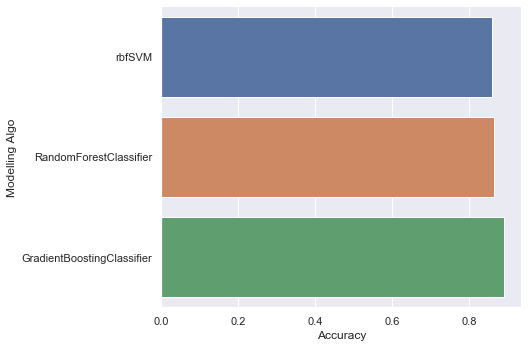

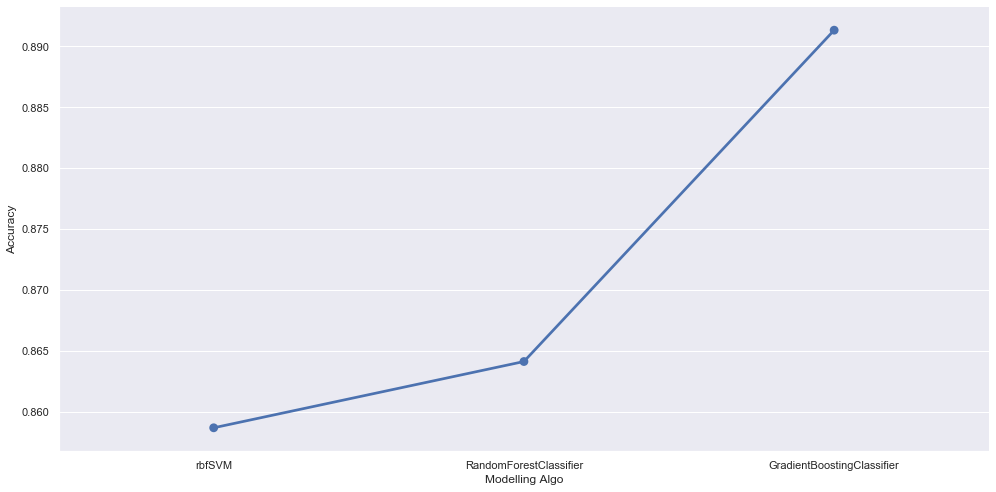

In [223]:
comp_models(met_df,'Accuracy')

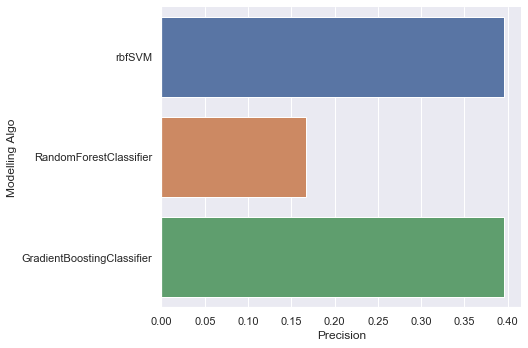

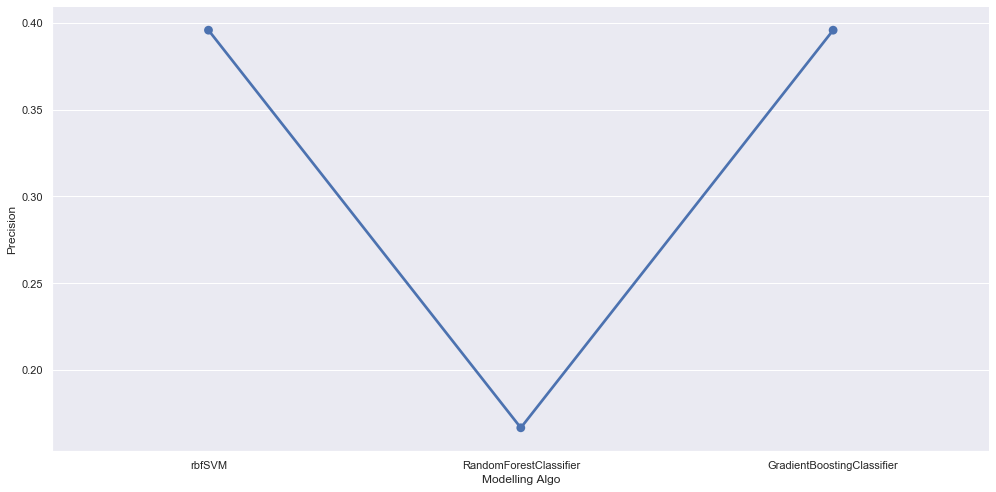

In [224]:
comp_models(met_df,'Precision')

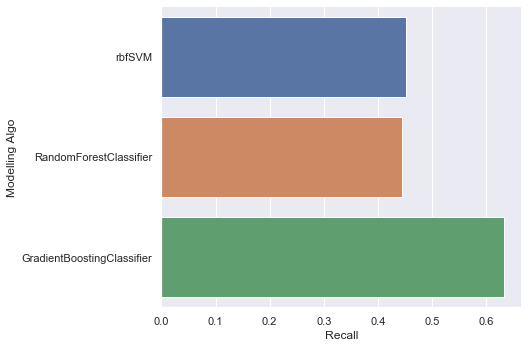

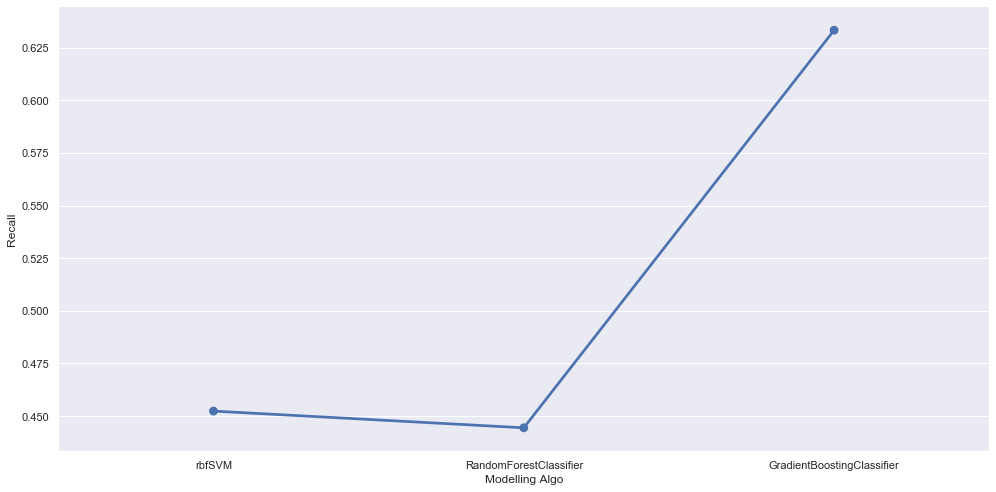

In [225]:
comp_models(met_df,'Recall')

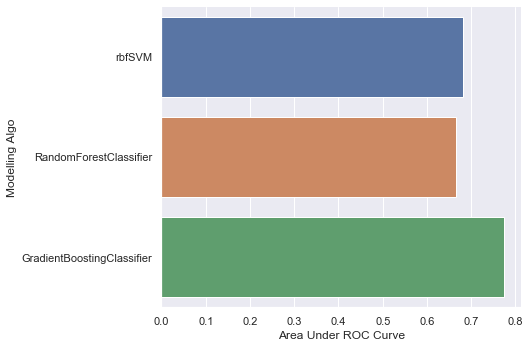

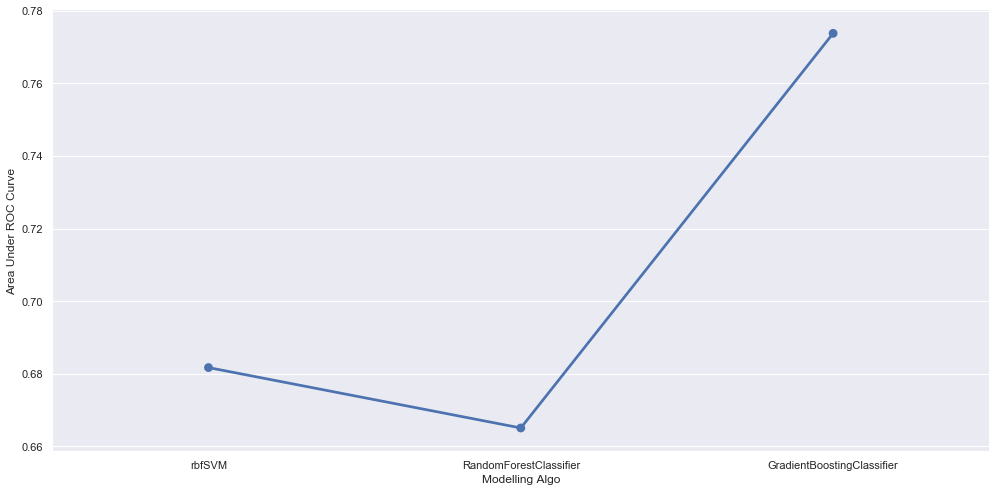

In [226]:
comp_models(met_df,'Area Under ROC Curve')

***